In [244]:
import math
import cmath
import numpy as np 
import matplotlib.pyplot as plt 
import sympy as sym

In [245]:
#define some mathematical constants 
sqrt = math.sqrt
s = sqrt(2)
e = cmath.exp
i = 1j 
pi = np.pi

In [246]:
def norm(v):
    norm = np.linalg.norm(v)
    return v/norm

In [247]:
#define optical components 
beam_splitter = [[1/s,i/s],[i/s,1/s]]
def unitary_mzi(theta, l):
    loss = [[l,0],[0,l]]
    phase_shifter = [[1, 0], [0, e(i*theta)]]
    return np.matmul(np.matmul(beam_splitter, phase_shifter), np.matmul(loss, beam_splitter))

In [249]:
def prob(theta, loss, psi_in):
    psi_in = norm(psi_in)
    psi_out = np.matmul(unitary_mzi(theta, loss), psi_in)

    o1 = abs(psi_out[0])**2
    o2 = abs(psi_out[1])**2

    return o1,o2

In [252]:
#plot the probabilties 
def plot(input_state, loss):
    det_1 = []
    det_2 = []

    phase = np.linspace(0, 2*pi, 50)

    for n in range(len(phase)):
        d1, d2 = prob(phase[n], loss, input_state)
        det_1.append(d1)
        det_2.append(d2)

    plt.title(f'Probability Distribution for input state {input_state} in MZI')
    plt.xlabel('Phase (radians)')
    plt.ylabel('Probability')
    plt.ylim(-0.05,1.05)
    plt.scatter(phase, det_1, label='Detector 1', marker='x')
    plt.scatter(phase, det_2, label='Detector 2', marker='x')
    plt.legend(loc=1)
    plt.show()

    print(round(max(det_1),2))
    print(round(max(det_2),2))

In [248]:
#define optical componenets and states symbolically
phi = sym.Symbol('phi', real=True)
a = sym.Symbol('a', real=True)
b = sym.Symbol('b', real=True)
psi_in = sym.Matrix([a,b])
psi_in = psi_in/psi_in.norm()
beam_splitter2 = sym.Matrix(beam_splitter)
phase_shifter = sym.Matrix([[1,0], [0, sym.exp(i*phi)]])
u_mzi = beam_splitter2*(phase_shifter*beam_splitter2)
psi_out = u_mzi*psi_in

In [250]:
#define probabilities symbollically 
p1 = sym.simplify(sym.Abs(psi_out[0])**2)
p2 = sym.simplify(sym.Abs(psi_out[1])**2)

In [251]:
#get the probability distribution symbolically 
def plot_sym(x,y):
    det_1 = []
    det_2 = []

    phase = np.linspace(0, 2*pi, 50)

    for n in range(len(phase)):
        d1 = sym.re(p1.evalf(subs={a:x, b:y, phi:phase[n]}))
        d2 = sym.re(p2.evalf(subs={a:x, b:y, phi:phase[n]}))
        det_1.append(d1)
        det_2.append(d2)

    plt.title(f'Probability Distribution for input state [{x},{y}] in MZI')
    plt.xlabel('Phase (radians)')
    plt.ylabel('Probability')
    plt.ylim(-0.05,1.05)
    plt.scatter(phase, det_1, label='Detector 1', marker='x')
    plt.scatter(phase, det_2, label='Detector 2', marker='x')
    plt.legend(loc=1)
    plt.show()

    print(round(max(det_1),2))
    print(round(max(det_2),2))

In [274]:
prob1 = sym.simplify(p1).evalf(subs={a:1, b:0})
print(prob1)

(-0.25*a**2 - 0.5*I*a*b + 0.25*b**2 + (-0.25*a**2*exp(1.0*I*phi) + 0.5*a**2 + 0.5*I*a*b*exp(1.0*I*phi) + 0.25*b**2*exp(1.0*I*phi) + 0.5*b**2)*exp(1.0*I*phi))*exp(-1.0*I*phi)/(a**2 + b**2)


In [263]:
dpsi = sym.diff(psi_out, phi)
dpsi_bra = sym.conjugate(dpsi.T)
in1 = sym.simplify(dpsi_bra*dpsi)
in2 = sym.simplify(dpsi_bra*psi_out)
print(in1, in2)
fish = 4*sym.simplify(in1 + sym.Abs(in2)**2)

Matrix([[0.500000000000000]]) Matrix([[-0.5*I]])


In [253]:
one_photon = [1,0]
two_photon = [1,1]

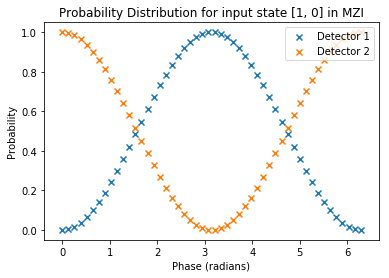

1.0
1.0


In [254]:
plot(one_photon, 1)

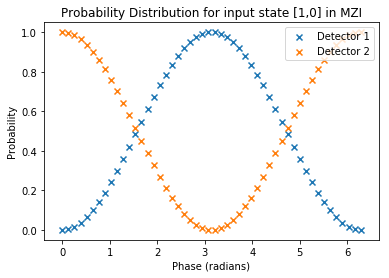

1.0
1.0


In [255]:
plot_sym(1,0)